The aim of classification of celestial bodies using CNN is to improve our understanding of the universe by providing accurate and efficient tools for classifying and analyzing the vast amounts of data collected by astronomical observatories and telescopes.This automates the process of identifying and categorizing various astronomical objects in images obtained by telescopes and other instruments. This can include galaxies, stars, nebulae, supernovae, and other celestial bodies.

In [1]:
# import library, the libraries we will be using are TensorFlow and Keras.
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [3]:
#Specifiying the folder where images are present
TrainingIP="C:\\Users\\user\\Desktop\\Nithya VB\\Capstone\\DL_CNN\\train"

In [4]:
validationIP="C:\\Users\\user\\Desktop\\Nithya VB\\Capstone\\DL_CNN\\test"

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
# Base model
train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
##Generating the Training data
training_set = train_datagen.flow_from_directory(TrainingIP, target_size=(64,64), batch_size=20, class_mode='categorical')

Found 1289 images belonging to 11 classes.


In [8]:
#Generating the validation data
validation_set = test_datagen.flow_from_directory(validationIP, target_size=(64,64), batch_size=20, class_mode='categorical')

Found 300 images belonging to 11 classes.


In [9]:
labels = {value: key for key, value in training_set.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : asteroids
1 : earth
2 : jupiter
3 : mars
4 : moon
5 : neptune
6 : saturn
7 : spiral
8 : stars
9 : uranus
10 : venus


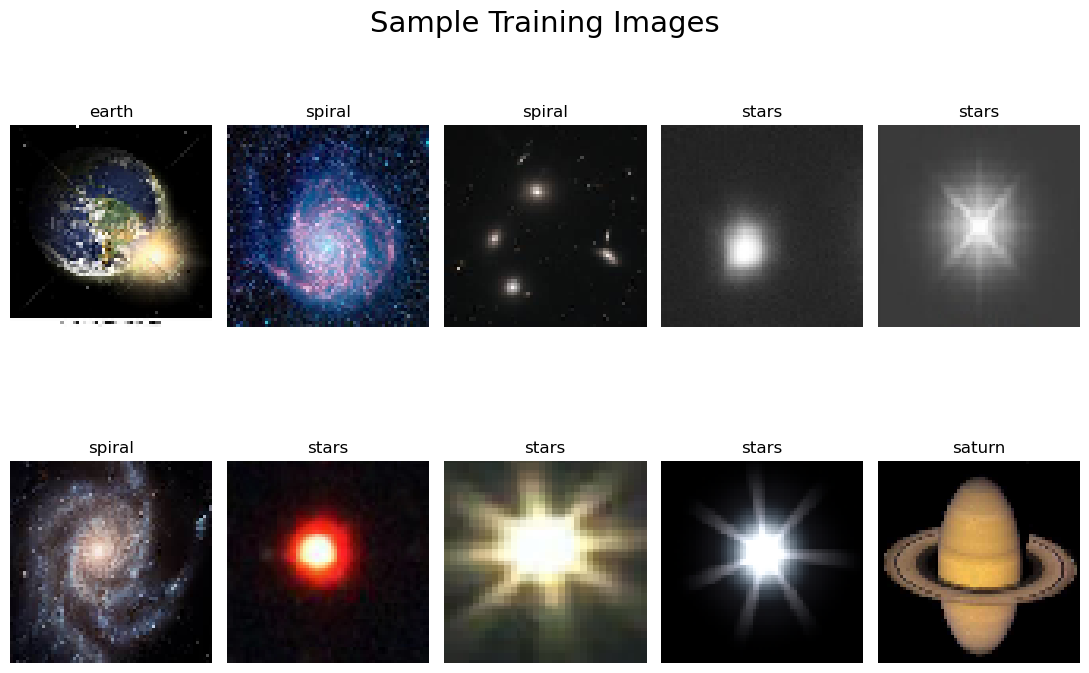

In [10]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(11, 8))
idx = 0

for i in range(2):
    for j in range(5):
        label = labels[np.argmax(training_set[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(training_set[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

In [11]:
classifier= Sequential()

In [12]:
callbacks=tf.keras.callbacks.EarlyStopping(min_delta=0.0005,patience=3)

In [13]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.5, zoom_range=0.5, width_shift_range=0.2, height_shift_range=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

In [14]:
training_set = train_datagen.flow_from_directory(TrainingIP, target_size=(64,64), batch_size=20, class_mode='categorical')

Found 1289 images belonging to 11 classes.


In [15]:
validation_set = test_datagen.flow_from_directory(validationIP, target_size=(64,64), batch_size=20, class_mode='categorical')

Found 300 images belonging to 11 classes.


In [16]:
classifier= Sequential()

In [17]:
classifier.add(Conv2D(32, kernel_size=(3, 3), padding='valid', input_shape=(64,64,3), activation='relu'))

classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))

classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))

classifier.add(Flatten())

classifier.add(Dense(64, activation='relu'))
classifier.add(Dense(11, activation='softmax'))


In [18]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 9216)             

In [19]:
classifier.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=["accuracy"])

In [21]:
history = classifier.fit(training_set, validation_data=validation_set, epochs=100, callbacks=[callbacks])

Epoch 1/100
65/65 [==============================] - 42s 627ms/step - loss: 0.8299 - accuracy: 0.7215 - val_loss: 0.8089 - val_accuracy: 0.7733
Epoch 2/100
65/65 [==============================] - 52s 805ms/step - loss: 0.7526 - accuracy: 0.7494 - val_loss: 0.5881 - val_accuracy: 0.7833
Epoch 3/100
65/65 [==============================] - 52s 811ms/step - loss: 0.7083 - accuracy: 0.7541 - val_loss: 0.6190 - val_accuracy: 0.8000
Epoch 4/100
65/65 [==============================] - 55s 856ms/step - loss: 0.6082 - accuracy: 0.7859 - val_loss: 0.5726 - val_accuracy: 0.8367
Epoch 5/100
65/65 [==============================] - 57s 739ms/step - loss: 0.5833 - accuracy: 0.8029 - val_loss: 0.7636 - val_accuracy: 0.7767
Epoch 6/100
65/65 [==============================] - 70s 1s/step - loss: 0.5535 - accuracy: 0.8076 - val_loss: 0.4651 - val_accuracy: 0.8633
Epoch 7/100
65/65 [==============================] - 79s 1s/step - loss: 0.5745 - accuracy: 0.7983 - val_loss: 0.5458 - val_accuracy: 0.830

In [23]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

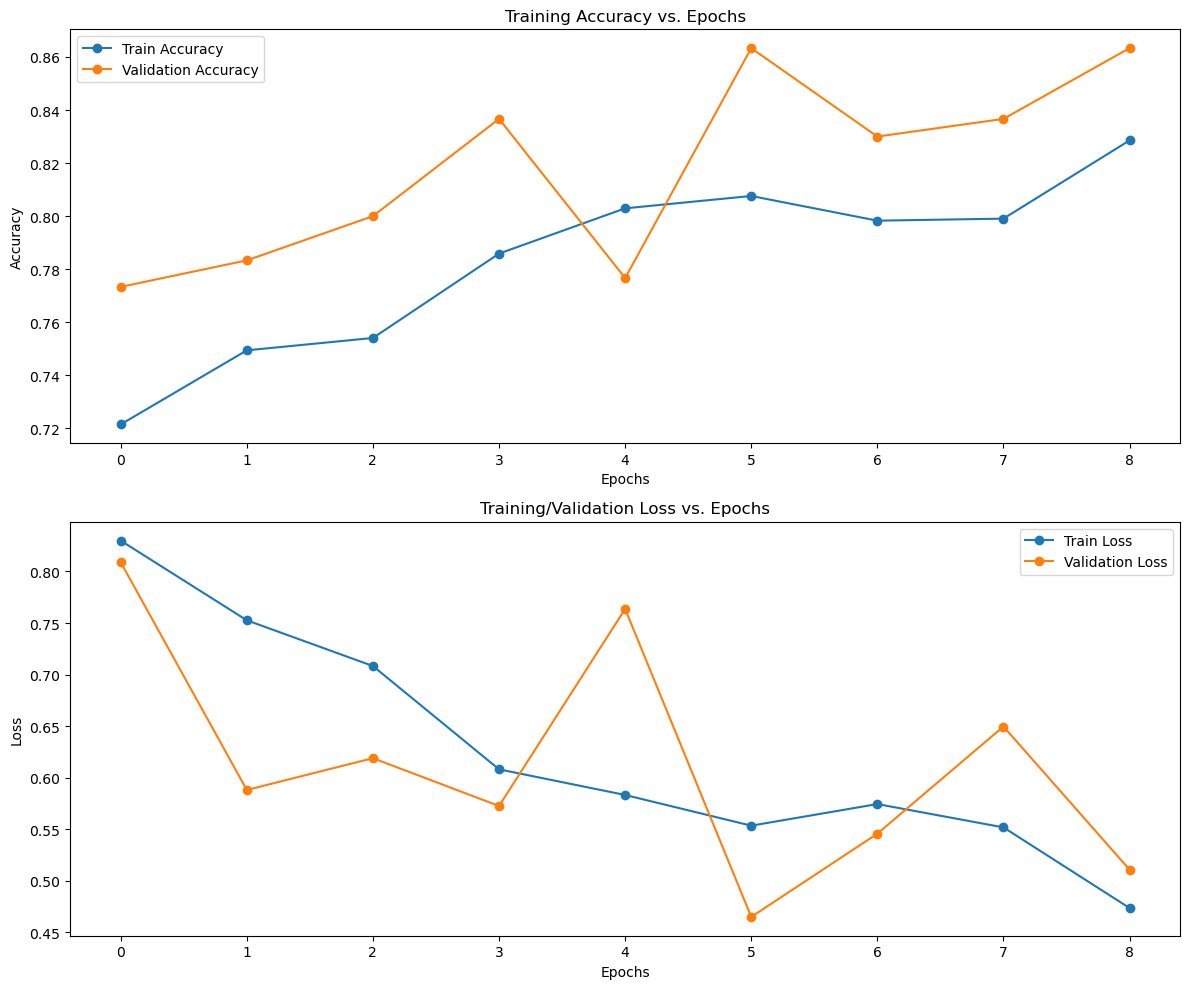

In [24]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')


plt.tight_layout()
plt.show()

### Wrong predictions
Let's see where the model has given wrong predictions and what were the actual predictions on those images.

In [25]:
from sklearn.metrics import confusion_matrix, classification_report

In [26]:
predictions = classifier.predict(validation_set)

15/15 [==============================] - 5s 303ms/step


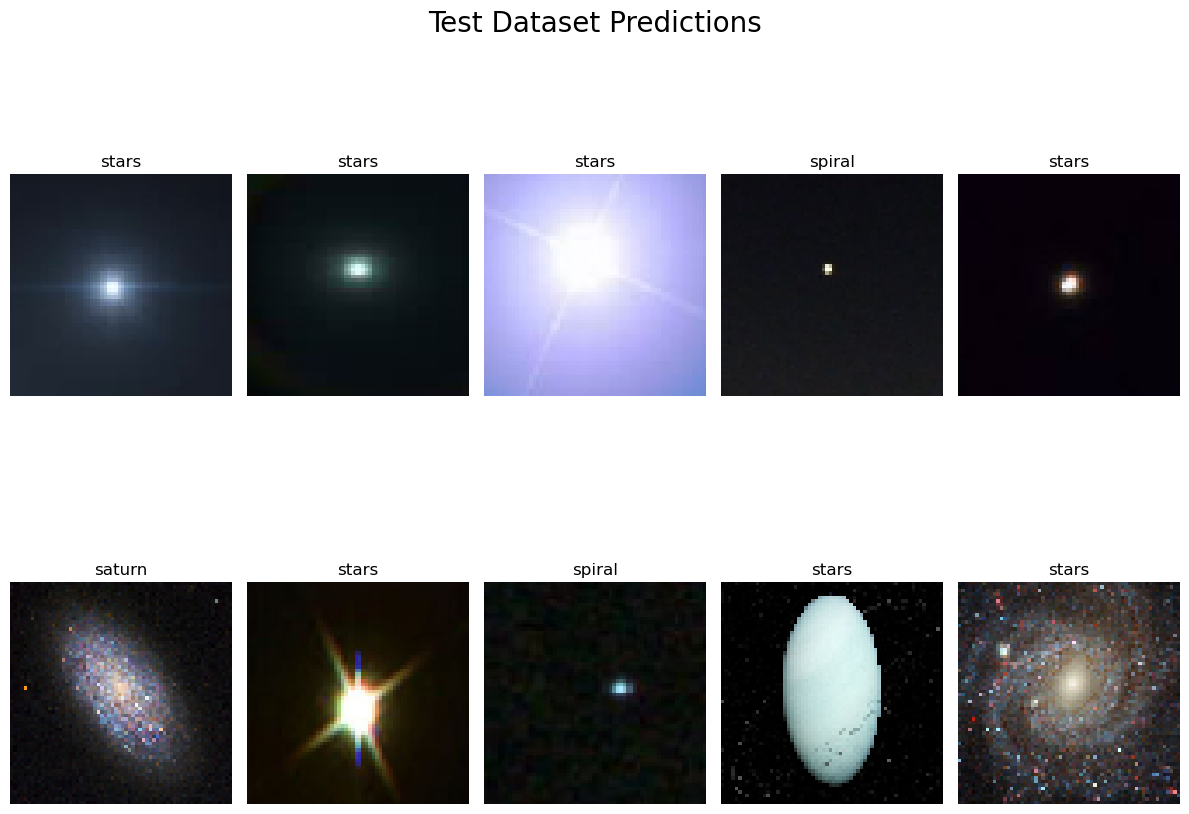

In [27]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 10))
idx = 0

for i in range(2):
    for j in range(5):
        predicted_label = labels[np.argmax(predictions[idx])]
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(validation_set[0][0][idx])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()

In [28]:
y_pred = np.argmax(predictions, axis=1)
y_true = validation_set.classes

In [29]:
errors = (y_true - y_pred != 0)
y_true_errors = y_true[errors]
y_pred_errors = y_pred[errors]

In [30]:
test_images = validation_set.filenames
test_img = np.asarray(test_images)[errors]

In [31]:
import os
import cv2

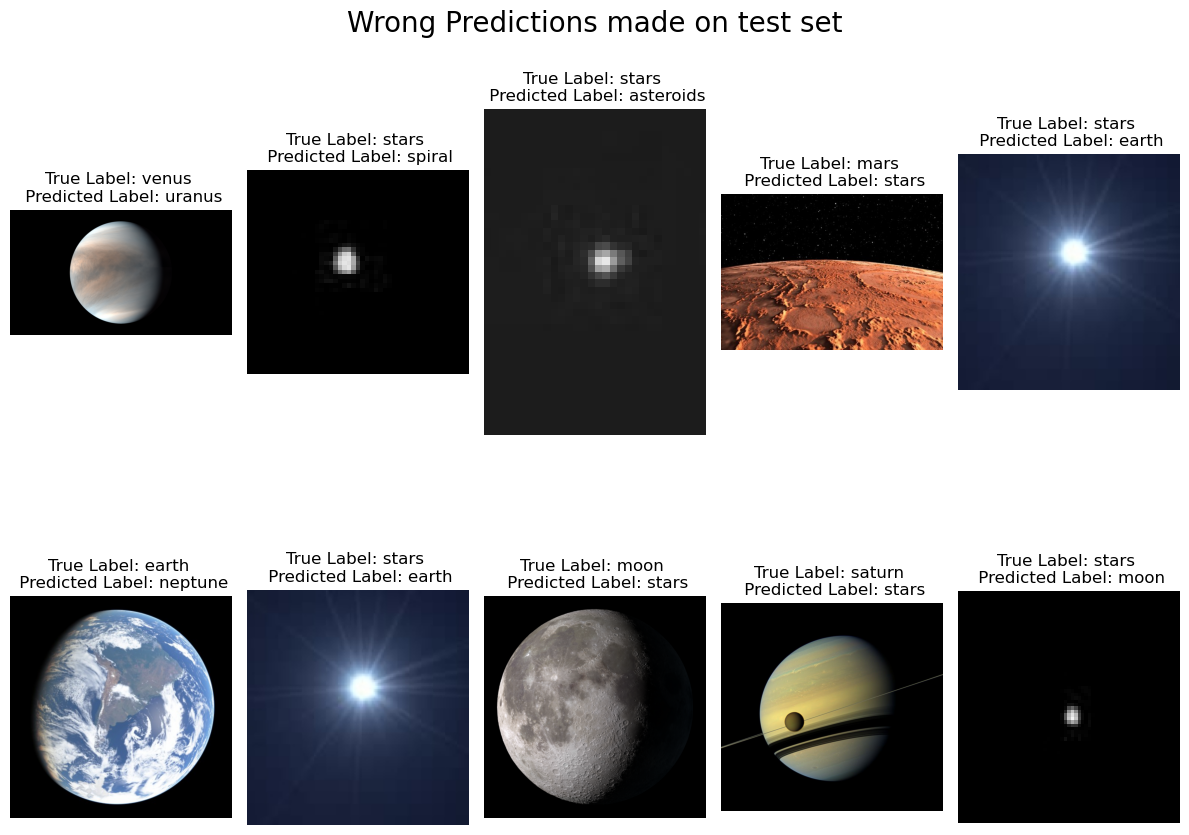

In [32]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 10))
idx = 0

for i in range(2):
    for j in range(5):
        idx = np.random.randint(0, len(test_img))
        true_index = y_true_errors[idx]
        true_label = labels[true_index]
        predicted_index = y_pred_errors[idx]
        predicted_label = labels[predicted_index]
        ax[i, j].set_title(f"True Label: {true_label} \n Predicted Label: {predicted_label}")
        img_path = os.path.join(validationIP, test_img[idx])
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax[i, j].imshow(img)
        ax[i, j].axis("off")

plt.tight_layout()
plt.suptitle('Wrong Predictions made on test set', fontsize=20)
plt.show()